In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import matplotlib.pyplot as plt

2023-04-01 17:40:03.460235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 17:40:03.501832: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 17:40:03.502645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 17:40:04.266531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(f'Versão da biblioteca TensorFlow: {tf.__version__}')

Versão da biblioteca TensorFlow: 2.12.0


In [3]:
# Carregando base de dados
data = tf.keras.datasets.boston_housing

# Divisao em base para treino e base para teste
(x_train, y_train), (x_test, y_test) = data.load_data()

In [4]:
# Tipo de dado 
print(type(x_train))

<class 'numpy.ndarray'>


In [5]:
# Formato dos dados de treino
print(x_train.shape)

(404, 13)


In [6]:
# Formato dados teste
print(x_test.shape)

(102, 13)


In [7]:
# Primeira amostra da base de treino
print(x_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [8]:
# Primeira amostra da base de teste
print(y_test[0])

7.2


In [9]:
# Normalização através da média e desvio padrão
media = x_train.mean(axis = 0)
desvio = x_train.std(axis = 0)

x_train = (x_train - media)/desvio
x_test = (x_test - media)/desvio

In [10]:
# Definição do modelo
model = Sequential([
    Dense(units = 256,
          activation = 'relu',
          input_shape = [13]),
    Dense(units = 128,
         activation = 'relu'),
    Dense(units = 64,
         activation = 'relu'),
    Dense(units = 1)
])

2023-04-01 17:40:06.168372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-01 17:40:06.170560: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44,801
Trainable params: 44,801
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'adam',
              loss = 'mse', #Erro quadrático médio
              metrics = ['mae']) # Erro absoluto médio

In [13]:
%time

history = model.fit(x_train,
                    y_train,
                    epochs= 200,
                    validation_split = 0.2)

CPU times: user 22 µs, sys: 5 µs, total: 27 µs
Wall time: 39.1 µs
Epoch 1/200
11/11 [==============================] - 1s 16ms/step - loss: 525.6942 - mae: 20.9778 - val_loss: 514.6495 - val_mae: 20.6952
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 351.7709 - mae: 16.4235 - val_loss: 253.7385 - val_mae: 13.5330
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 125.1394 - mae: 8.9664 - val_loss: 77.5301 - val_mae: 6.8669
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 75.7704 - mae: 6.5012 - val_loss: 47.9052 - val_mae: 5.2284
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 40.1309 - mae: 4.4693 - val_loss: 39.7482 - val_mae: 4.5090
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 27.4453 - mae: 3.5774 - val_loss: 23.6498 - val_mae: 3.6686
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 22.5260 - mae: 3.3805 - val_loss: 21.0054 - val_mae: 

Epoch 62/200
11/11 [==============================] - 0s 4ms/step - loss: 6.1679 - mae: 1.7882 - val_loss: 14.4639 - val_mae: 2.6273
Epoch 63/200
11/11 [==============================] - 0s 4ms/step - loss: 5.7046 - mae: 1.7112 - val_loss: 12.9927 - val_mae: 2.5403
Epoch 64/200
11/11 [==============================] - 0s 4ms/step - loss: 5.8222 - mae: 1.7094 - val_loss: 14.3677 - val_mae: 2.6263
Epoch 65/200
11/11 [==============================] - 0s 4ms/step - loss: 5.4733 - mae: 1.6179 - val_loss: 12.6200 - val_mae: 2.4540
Epoch 66/200
11/11 [==============================] - 0s 4ms/step - loss: 6.1100 - mae: 1.7882 - val_loss: 12.9160 - val_mae: 2.5583
Epoch 67/200
11/11 [==============================] - 0s 4ms/step - loss: 5.8763 - mae: 1.7309 - val_loss: 13.6284 - val_mae: 2.5399
Epoch 68/200
11/11 [==============================] - 0s 4ms/step - loss: 5.4248 - mae: 1.6605 - val_loss: 13.9664 - val_mae: 2.4462
Epoch 69/200
11/11 [==============================] - 0s 5ms/step - l

11/11 [==============================] - 0s 4ms/step - loss: 3.0909 - mae: 1.2602 - val_loss: 11.2055 - val_mae: 2.2485
Epoch 124/200
11/11 [==============================] - 0s 4ms/step - loss: 3.1708 - mae: 1.2941 - val_loss: 12.3581 - val_mae: 2.3199
Epoch 125/200
11/11 [==============================] - 0s 4ms/step - loss: 3.5734 - mae: 1.3931 - val_loss: 10.8032 - val_mae: 2.2465
Epoch 126/200
11/11 [==============================] - 0s 4ms/step - loss: 2.9850 - mae: 1.2388 - val_loss: 12.9577 - val_mae: 2.3858
Epoch 127/200
11/11 [==============================] - 0s 4ms/step - loss: 3.7910 - mae: 1.4153 - val_loss: 11.7823 - val_mae: 2.2518
Epoch 128/200
11/11 [==============================] - 0s 4ms/step - loss: 3.6888 - mae: 1.3844 - val_loss: 13.2172 - val_mae: 2.3646
Epoch 129/200
11/11 [==============================] - 0s 4ms/step - loss: 3.2471 - mae: 1.2804 - val_loss: 12.4179 - val_mae: 2.3286
Epoch 130/200
11/11 [==============================] - 0s 4ms/step - loss: 3

11/11 [==============================] - 0s 4ms/step - loss: 2.3392 - mae: 1.1724 - val_loss: 10.9278 - val_mae: 2.3797
Epoch 185/200
11/11 [==============================] - 0s 4ms/step - loss: 2.1450 - mae: 1.0802 - val_loss: 10.8789 - val_mae: 2.2151
Epoch 186/200
11/11 [==============================] - 0s 4ms/step - loss: 1.6704 - mae: 0.9201 - val_loss: 10.6264 - val_mae: 2.2728
Epoch 187/200
11/11 [==============================] - 0s 4ms/step - loss: 2.3571 - mae: 1.1321 - val_loss: 10.3033 - val_mae: 2.1472
Epoch 188/200
11/11 [==============================] - 0s 4ms/step - loss: 1.8479 - mae: 0.9921 - val_loss: 10.6054 - val_mae: 2.1957
Epoch 189/200
11/11 [==============================] - 0s 4ms/step - loss: 1.8198 - mae: 0.9809 - val_loss: 12.1462 - val_mae: 2.3321
Epoch 190/200
11/11 [==============================] - 0s 4ms/step - loss: 1.9472 - mae: 1.0533 - val_loss: 10.8178 - val_mae: 2.3044
Epoch 191/200
11/11 [==============================] - 0s 4ms/step - loss: 2

In [14]:
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
{'loss': [525.6941528320312, 351.7708740234375, 125.13941192626953, 75.77042388916016, 40.13093948364258, 27.445270538330078, 22.526037216186523, 19.749773025512695, 17.80361557006836, 16.92142677307129, 15.137969017028809, 14.302542686462402, 13.878190040588379, 14.770456314086914, 13.126358985900879, 12.466080665588379, 11.699370384216309, 11.04831600189209, 10.765092849731445, 10.49707317352295, 10.183755874633789, 9.879778861999512, 9.680665969848633, 9.675107955932617, 9.521893501281738, 9.238625526428223, 8.980219841003418, 9.0899076461792, 8.777449607849121, 8.655583381652832, 8.398309707641602, 8.187249183654785, 8.743584632873535, 8.6822509765625, 8.220050811767578, 7.7049970626831055, 7.658603191375732, 7.612133026123047, 7.425282955169678, 8.609354972839355, 8.129250526428223, 8.720839500427246, 7.6964335441589355, 7.086719989776611, 6.762053489685059, 7.165075302124023, 6.557671070098877, 6.362804412841797, 6.313501834869385

In [15]:
loss, mae = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 16.8841 - mae: 2.8907


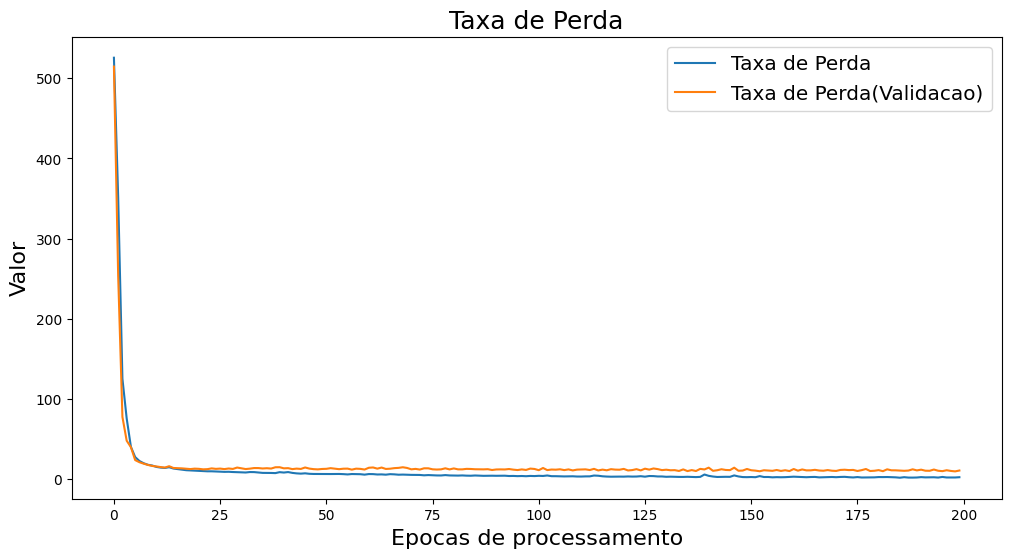

In [16]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda(Validacao)'],
            loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Taxa de Perda', fontsize = 18)
plt.show()

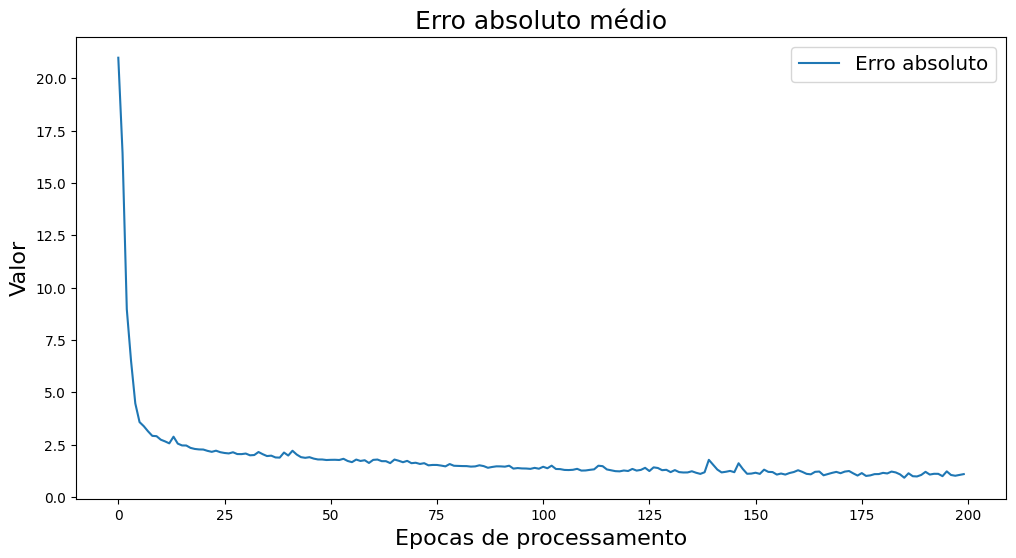

In [17]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(history.history['mae'])
plt.legend(['Erro absoluto'],
          loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Valor', fontsize = 16)
plt.title('Erro absoluto médio', fontsize = 18)
plt.show()

In [18]:
x_new = x_test[:10]
y_pred = model.predict(x_new)

1/1 [==============================] - 0s 63ms/step


In [19]:
print(y_pred[0])

[8.734448]


In [20]:
model.save('./regressor.h5')
model.save_weights('./regressor_weights.h5')

In [21]:
x_new = x_test[:25]
z_pred = model.predict(x_new)
print(z_pred[0])

1/1 [==============================] - 0s 15ms/step
[8.734448]


In [22]:
model = Sequential()
model = load_model('./regressor.h5')
model.load_weights('./regressor.h5')